# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st


# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [16]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list

    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))


619


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [17]:
print('Beginning Data Retrieval')
print('---------------------------')
counter = 0
for city in cities:
    print(f'Processing Record {counter} of set 1 | {city}')
    counter = counter + 1

Beginning Data Retrieval
---------------------------
Processing Record 0 of set 1 | ushuaia
Processing Record 1 of set 1 | mataura
Processing Record 2 of set 1 | vaitupu
Processing Record 3 of set 1 | nikolskoye
Processing Record 4 of set 1 | beringovskiy
Processing Record 5 of set 1 | arraial do cabo
Processing Record 6 of set 1 | kruisfontein
Processing Record 7 of set 1 | port alfred
Processing Record 8 of set 1 | ovsyanka
Processing Record 9 of set 1 | east london
Processing Record 10 of set 1 | tevriz
Processing Record 11 of set 1 | hobart
Processing Record 12 of set 1 | hosur
Processing Record 13 of set 1 | bolungarvik
Processing Record 14 of set 1 | atuona
Processing Record 15 of set 1 | kapaa
Processing Record 16 of set 1 | sabha
Processing Record 17 of set 1 | puerto ayora
Processing Record 18 of set 1 | emba
Processing Record 19 of set 1 | chokurdakh
Processing Record 20 of set 1 | tiksi
Processing Record 21 of set 1 | barrow
Processing Record 22 of set 1 | hilo
Processing Re

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
## Finding * Display the DataFrame

In [20]:
city1 = []
Lat = []
Long = []
maxtemp = []
humidity = []
cloudiness = []
windspeed = []
country = []
date1 = []

# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="
query_url

for city in cities:
    response = requests.get(query_url + city).json()
    
    #try finding the cities and append the information to columns
    try:
        city1.append(response['name'])
        Lat.append(response['coord']['lat'])
        Long.append(response['coord']['lon'])
        maxtemp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        windspeed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date1.append(response['dt'])
    
    #Skip the cities which do not have any temperature record
    except KeyError:
        print(f'Skipped City: {city}')

print(len(city1))
print(len(Lat))
print(len(Long))
print(len(maxtemp))
print(len(humidity))
print(len(cloudiness))
print(len(windspeed))
print(len(country))
print(len(date1))

### Creating a Datafram 
df = pd.DataFrame({'City': city1,
                   'Lat' : Lat,
                   'Lng' : Long,
                   'Max Temp': maxtemp,
                   'Humidity':humidity,
                   'Cloudiness':cloudiness,
                   'Wind Speed': windspeed,
                   'Country' : country,
                   'Date': date1
                  })




Skipped City: vaitupu
Skipped City: bolungarvik
Skipped City: piryion
Skipped City: attawapiskat
Skipped City: taolanaro
Skipped City: samusu
Skipped City: mys shmidta
Skipped City: illoqqortoormiut
Skipped City: belushya guba
Skipped City: oreanda
Skipped City: of
Skipped City: nizhneyansk
Skipped City: malwan
Skipped City: aflu
Skipped City: bandar-e torkaman
Skipped City: hakvik
Skipped City: kesennuma
Skipped City: lolua
Skipped City: safwah
Skipped City: sorvag
Skipped City: vastervik
Skipped City: ksenyevka
Skipped City: ust-kamchatsk
Skipped City: ituni
Skipped City: sentyabrskiy
Skipped City: lemesos
Skipped City: barentsburg
Skipped City: linchuan
Skipped City: amderma
Skipped City: bengkalis
Skipped City: ngukurr
Skipped City: solsvik
Skipped City: tsihombe
Skipped City: eskasem
Skipped City: saleaula
Skipped City: sumbawa
Skipped City: gurgan
Skipped City: burica
Skipped City: kazalinsk
Skipped City: halalo
Skipped City: vestbygda
Skipped City: scalloway
Skipped City: stoyba

In [21]:
# Export the city data into a .csv.
# Display the DataFrame

df.to_csv('../output_data/cities_t.csv', index=False)
df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ushuaia,-54.8000,-68.3000,44.60,76,40,18.41,AR,1618933038
1,Mataura,-46.1927,168.8643,48.99,84,39,1.99,NZ,1618933038
2,Nikolskoye,59.7035,30.7861,54.00,26,0,11.18,RU,1618933039
3,Beringovskiy,63.0500,179.3167,9.88,93,23,4.68,RU,1618933039
4,Arraial do Cabo,-22.9661,-42.0278,80.60,69,20,28.77,BR,1618933039


In [22]:
# Describe
df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,562.000000,562.000000,562.000000,562.000000,562.000000,562.000000,5.620000e+02
mean,19.411838,18.779609,61.460569,66.345196,51.777580,8.300961,1.618933e+09
std,33.338114,91.169215,23.386273,23.071965,37.702636,5.621093,8.357001e+01
min,-54.800000,-175.200000,-15.810000,4.000000,0.000000,0.670000,1.618933e+09
25%,-7.566825,-57.667725,44.812500,54.000000,15.000000,4.090000,1.618933e+09
50%,21.970950,21.079000,67.955000,70.000000,52.000000,6.910000,1.618933e+09
75%,47.479150,95.913050,79.045000,84.000000,90.000000,11.500000,1.618933e+09
max,78.218600,179.316700,107.600000,100.000000,100.000000,28.770000,1.618933e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [24]:
print('Since the Max of Humidity is 100, No city has humidity greater than 100 So this step Skipped')
df.describe()

Since the Max of Humidity is 100, No Humidity greater than 100 So this step Skipped


,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,562.000000,562.000000,562.000000,562.000000,562.000000,562.000000,5.620000e+02
mean,19.411838,18.779609,61.460569,66.345196,51.777580,8.300961,1.618933e+09
std,33.338114,91.169215,23.386273,23.071965,37.702636,5.621093,8.357001e+01
min,-54.800000,-175.200000,-15.810000,4.000000,0.000000,0.670000,1.618933e+09
25%,-7.566825,-57.667725,44.812500,54.000000,15.000000,4.090000,1.618933e+09
50%,21.970950,21.079000,67.955000,70.000000,52.000000,6.910000,1.618933e+09
75%,47.479150,95.913050,79.045000,84.000000,90.000000,11.500000,1.618933e+09
max,78.218600,179.316700,107.600000,100.000000,100.000000,28.770000,1.618933e+09


In [ ]:
#  Get the indices of cities that have humidity over 100%.


In [25]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = df
clean_city_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ushuaia,-54.8000,-68.3000,44.60,76,40,18.41,AR,1618933038
1,Mataura,-46.1927,168.8643,48.99,84,39,1.99,NZ,1618933038
2,Nikolskoye,59.7035,30.7861,54.00,26,0,11.18,RU,1618933039
3,Beringovskiy,63.0500,179.3167,9.88,93,23,4.68,RU,1618933039
4,Arraial do Cabo,-22.9661,-42.0278,80.60,69,20,28.77,BR,1618933039
...,...,...,...,...,...,...,...,...,...
557,Kirakira,-10.4544,161.9205,79.61,84,92,5.95,SB,1618933234
558,Bose,45.4612,8.0137,66.20,24,20,4.61,IT,1618933235
559,Nyurba,63.2842,118.3319,-3.68,99,52,3.58,RU,1618933235
560,Puerto Rondón,6.2805,-71.1000,91.38,38,58,10.33,CO,1618933235


In [ ]:
###  Converting the Unix date format to yyyy-mm-dd and then spliting the column to separate date and time
# clean_city_data['Date'] = pd.to_datetime(clean_city_data['Date']).astype(str)
# # clean_city_data
# clean_city_data[['dte', 'Time']] = clean_city_data['Date'].str.split(' ', n=1, expand=True)
# clean_city_data

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

This charts shows the city temperature at the latitude the City is located. More close the city is to the equator higher the temperature.


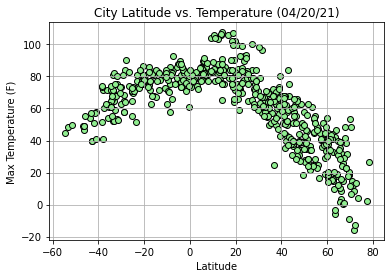

In [32]:
# dte1 = clean_city_data.iloc[0]['dte']
plt.scatter(clean_city_data['Lat'], clean_city_data['Max Temp'], color='lightgreen', marker='o', edgecolors='black')
plt.grid()
plt.title(f'City Latitude vs. Temperature (04/20/21)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
print('This charts shows the city temperature at the latitude the City is located. More close the city is to the equator higher the temperature.')

## Latitude vs. Humidity Plot

This charts shows the Humidity at the latitude the City is located. Humidity is scatterd all over the place. Humidity percent does not depend on the latitude.


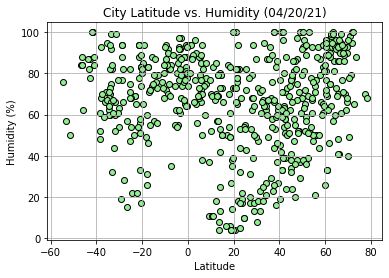

In [33]:
plt.scatter(clean_city_data['Lat'], clean_city_data['Humidity'], color='lightgreen', marker='o', edgecolors='black')
plt.grid()
plt.title(f'City Latitude vs. Humidity (04/20/21)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
print('This charts shows the Humidity at the latitude the City is located. Humidity is scatterd all over the place. Humidity percent does not depend on the latitude.')

## Latitude vs. Cloudiness Plot

This charts shows the Cloudiness at the latitude the City is located. Cloudiness is scatterd all over the place. Cloudiness does not depend on the latitude.


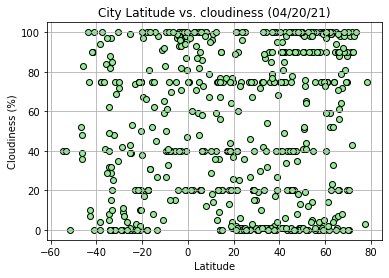

In [34]:
plt.scatter(clean_city_data['Lat'], clean_city_data['Cloudiness'], color='lightgreen', marker='o', edgecolors='black')
plt.grid()
plt.title(f'City Latitude vs. cloudiness (04/20/21)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
print('This charts shows the Cloudiness at the latitude the City is located. Cloudiness is scatterd all over the place. Cloudiness does not depend on the latitude.')

## Latitude vs. Wind Speed Plot

This charts shows the Windspeed at the latitude the City is located. Windspeed is scatterd all over the place. windspeed does not depend on the latitude.


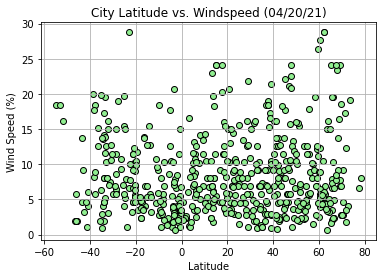

In [36]:
plt.scatter(clean_city_data['Lat'], clean_city_data['Wind Speed'], color='lightgreen', marker='o', edgecolors='black')
plt.grid()
plt.title(f'City Latitude vs. Windspeed (04/20/21)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (%)')
print('This charts shows the Windspeed at the latitude the City is located. Windspeed is scatterd all over the place. windspeed does not depend on the latitude.')

## Linear Regression

In [39]:
city_data_NH = clean_city_data[clean_city_data['Lat'] > 0]
city_data_NH

city_data_SH = clean_city_data[clean_city_data['Lat'] < 0]
city_data_SH

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ushuaia,-54.8000,-68.3000,44.60,76,40,18.41,AR,1618933038
1,Mataura,-46.1927,168.8643,48.99,84,39,1.99,NZ,1618933038
4,Arraial do Cabo,-22.9661,-42.0278,80.60,69,20,28.77,BR,1618933039
5,Kruisfontein,-34.0033,24.7314,70.00,70,88,1.99,ZA,1618933040
6,Port Alfred,-33.5906,26.8910,69.51,75,97,19.57,ZA,1618933040
...,...,...,...,...,...,...,...,...,...
548,Kasongo-Lunda,-6.4667,16.8167,75.56,89,100,1.36,CD,1618933231
550,Aquiraz,-3.9014,-38.3911,87.80,62,40,10.36,BR,1618933232
552,Gobabis,-22.4500,18.9667,72.73,22,0,7.76,NA,1618933232
557,Kirakira,-10.4544,161.9205,79.61,84,92,5.95,SB,1618933234


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation betwwen Northern Hemisphere Max temp and Latitude is -0.8687
The r-squared is: 0.7546848100410213
This charts shows the Max Temperature at the latitude the City is located in Northern Hemisphere. In Northern Hemisphere the Max Temperature decreases with increase in latitude. There is a negative correlation between latitude and the Max temperature in the norrthern hemisphere.


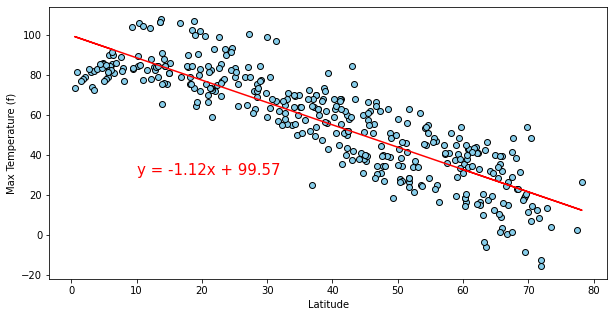

In [43]:

lati_NH = city_data_NH['Lat']
maxtemp_NH = city_data_NH['Max Temp']

#Calculation of Corelation Coefficient 
correlation = st.pearsonr(lati_NH, maxtemp_NH)
print(f'The correlation betwwen Northern Hemisphere Max temp and Latitude is {round(correlation[0],4)}')

# Perform a linear regression 
slope, intercept, rvalue, pvalue, stderr = st.linregress(lati_NH, maxtemp_NH)

# Create equation of line 
regress_values = lati_NH * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the graph and regression line
plt.figure(figsize=(10,5))
plt.scatter(lati_NH, maxtemp_NH, color='skyblue', marker='o', edgecolors='black')
plt.plot(lati_NH, regress_values, 'r-')
plt.annotate(line_eq,(10,30),fontsize=15,color='red')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (f)')
print(f'The r-squared is: {rvalue**2}')
print('This charts shows the Max Temperature at the latitude the City is located in Northern Hemisphere. In Northern Hemisphere the Max Temperature decreases with increase in latitude. There is a negative correlation between latitude and the Max temperature in the northern hemisphere.')

plt.show()


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation betwwen Southern Hemisphere Max temp and Latitude is 0.696
The r-squared is: 0.4844523956333642
This charts shows the Max Temperature at the latitude the City is located in Northern Hemisphere. In Northern Hemisphere the Max Temperature decreases with increase in latitude. There is a negative correlation between latitude and the Max temperature in the norrthern hemisphere.


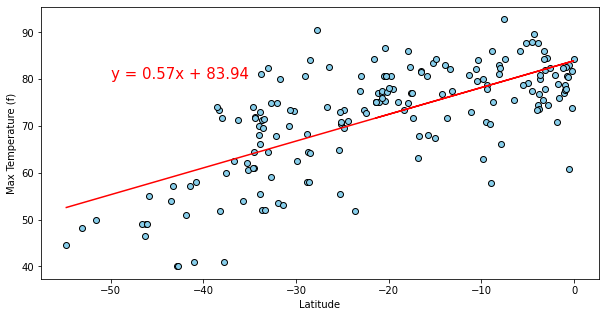

In [44]:
 
lati_SH = city_data_SH['Lat']
maxtemp_SH = city_data_SH['Max Temp']

#Calculation of Corelation Coefficient
correlation = st.pearsonr(lati_SH, maxtemp_SH)
print(f'The correlation betwwen Southern Hemisphere Max temp and Latitude is {round(correlation[0],4)}')

# Perform a linear regression
slope, intercept, rvalue, pvalue, stderr = st.linregress(lati_SH, maxtemp_SH)

# Create equation of line 
regress_values = lati_SH * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the graph and regression line
plt.figure(figsize=(10,5))
plt.scatter(lati_SH, maxtemp_SH, color='skyblue', marker='o', edgecolors='black')
plt.plot(lati_SH, regress_values, 'r-')
plt.annotate(line_eq,(-50,80),fontsize=15,color='red')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (f)')
print(f'The r-squared is: {rvalue**2}')
print('This charts shows the Max Temperature at the latitude the City is located in Sothern Hemisphere. In Southern Hemisphere the Max Temperature increases with increase in latitude. There is a positive correlation between latitude and the Max temperature in the Southern hemisphere.')
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation betwwen Northern Hemisphere Humidity and Latitude is 0.2477
The r-squared is: 0.06134532180027199
This charts shows the Humidity at the latitude the City is located in Northern Hemisphere. Although there is a positive correlation between latitude and the humidity in the northern hemisphere, the correlation is close to zero . Very low r-squared indicate that it is very difficult to predict the humidity levels at any latitude in northern hemisphere


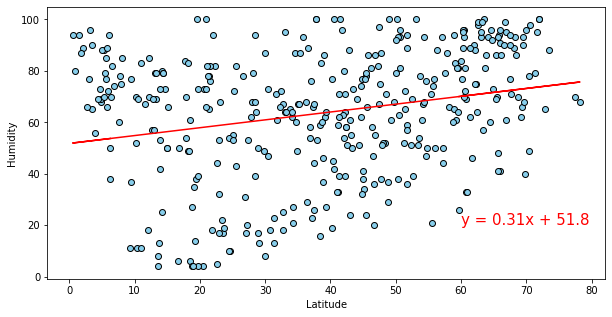

In [52]:

lati_NH = city_data_NH['Lat']
hum_NH = city_data_NH['Humidity']

#Calculation of Corelation Coefficient 
correlation = st.pearsonr(lati_NH, hum_NH)
print(f'The correlation betwwen Northern Hemisphere Humidity and Latitude is {round(correlation[0],4)}')

# Perform a linear regression 
slope, intercept, rvalue, pvalue, stderr = st.linregress(lati_NH, hum_NH)

# Create equation of line 
regress_values = lati_NH * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the graph and regression line
plt.figure(figsize=(10,5))
plt.scatter(lati_NH, hum_NH, color='skyblue', marker='o', edgecolors='black')
plt.plot(lati_NH, regress_values, 'r-')
plt.annotate(line_eq,(60,20),fontsize=15,color='red')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f'The r-squared is: {rvalue**2}')
print('This charts shows the Humidity at the latitude the City is located in Northern Hemisphere. Although there is a positive correlation between latitude and the humidity in the northern hemisphere, the correlation is close to zero . Very low r-squared indicate that it is very difficult to predict the humidity levels at any latitude in northern hemisphere')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation betwwen Southern Hemisphere Humidity and Latitude is 0.1329
The r-squared is: 0.01765676010454145
This charts shows the Humidity at the latitude the City is located in Southern Hemisphere. Although there is a positive correlation between latitude and the humidity in the Southern hemisphere, the correlation is close to zero indicates that there is very low correlation between the two. Very low r-squared indicate that it is very difficult to predict the humidity levels at any latitude in Southern hemisphere


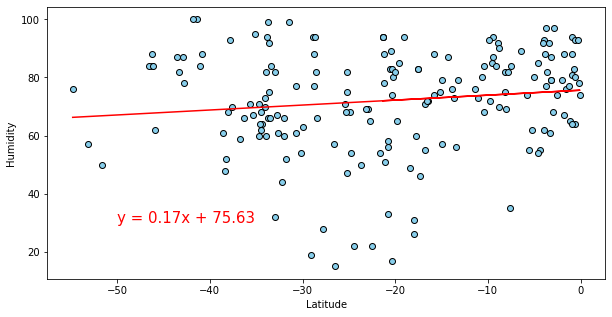

In [53]:
 
lati_SH = city_data_SH['Lat']
hum_SH = city_data_SH['Humidity']

#Calculation of Corelation Coefficient
correlation = st.pearsonr(lati_SH, hum_SH)
print(f'The correlation betwwen Southern Hemisphere Humidity and Latitude is {round(correlation[0],4)}')

# Perform a linear regression
slope, intercept, rvalue, pvalue, stderr = st.linregress(lati_SH, hum_SH)

# Create equation of line 
regress_values = lati_SH * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the graph and regression line
plt.figure(figsize=(10,5))
plt.scatter(lati_SH, hum_SH, color='skyblue', marker='o', edgecolors='black')
plt.plot(lati_SH, regress_values, 'r-')
plt.annotate(line_eq,(-50,30),fontsize=15,color='red')
plt.xlabel('Latitude')
plt.ylabel('Humidity ')
print(f'The r-squared is: {rvalue**2}')
print('This charts shows the Humidity at the latitude the City is located in Southern Hemisphere. Although there is a positive correlation between latitude and the humidity in the Southern hemisphere, the correlation is close to zero indicates that there is very low correlation between the two. Very low r-squared indicate that it is very difficult to predict the humidity levels at any latitude in Southern hemisphere')
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation betwwen Northern Hemisphere Cloudiness and Latitude is 0.0938
The r-squared is: 0.008795613393663086
This charts shows the Cloudiness at the latitude the City is located in Northern Hemisphere. Although there is a positive correlation between latitude and the Cloudiness in the northern hemisphere, the correlation is close to zero indicates that there is very low correlation between the two. Very low r-squared indicate that it is very difficult to predict the Cloudiness levels at any latitude in northern hemisphere


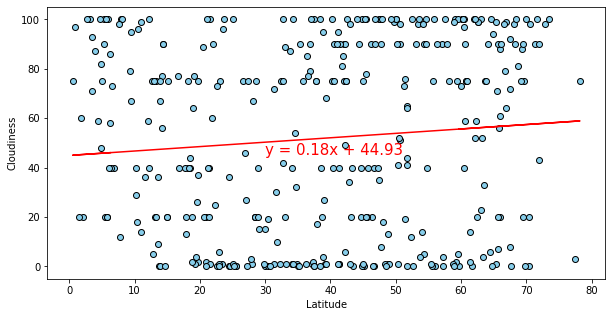

In [54]:

lati_NH = city_data_NH['Lat']
clo_NH = city_data_NH['Cloudiness']

#Calculation of Corelation Coefficient 
correlation = st.pearsonr(lati_NH, clo_NH)
print(f'The correlation betwwen Northern Hemisphere Cloudiness and Latitude is {round(correlation[0],4)}')

# Perform a linear regression 
slope, intercept, rvalue, pvalue, stderr = st.linregress(lati_NH, clo_NH)

# Create equation of line 
regress_values = lati_NH * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the graph and regression line
plt.figure(figsize=(10,5))
plt.scatter(lati_NH, clo_NH, color='skyblue', marker='o', edgecolors='black')
plt.plot(lati_NH, regress_values, 'r-')
plt.annotate(line_eq,(30,45),fontsize=15,color='red')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f'The r-squared is: {rvalue**2}')
print('This charts shows the Cloudiness at the latitude the City is located in Northern Hemisphere. Although there is a positive correlation between latitude and the Cloudiness in the northern hemisphere, the correlation is close to zero indicates that there is very low correlation between the two. Very low r-squared indicate that it is very difficult to predict the Cloudiness levels at any latitude in northern hemisphere')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation betwwen Southern Hemisphere Cloudiness and Latitude is 0.3336
The r-squared is: 0.1112990731734119
This charts shows the Cloudiness at the latitude the City is located in Southern Hemisphere. Although there is a positive correlation between latitude and the Cloudiness in the Southern hemisphere, the correlation is close to zero indicates that there is very low correlation between the two. Very low r-squared indicate that it is very difficult to predict the Cloudiness levels at any latitude in Southern hemisphere


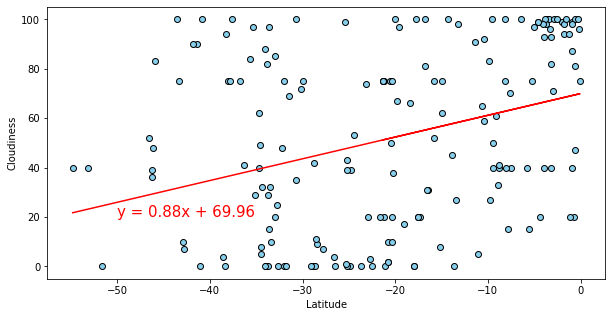

In [55]:
 
lati_SH = city_data_SH['Lat']
clo_SH = city_data_SH['Cloudiness']

#Calculation of Corelation Coefficient
correlation = st.pearsonr(lati_SH, clo_SH)
print(f'The correlation betwwen Southern Hemisphere Cloudiness and Latitude is {round(correlation[0],4)}')

# Perform a linear regression
slope, intercept, rvalue, pvalue, stderr = st.linregress(lati_SH, clo_SH)

# Create equation of line 
regress_values = lati_SH * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the graph and regression line
plt.figure(figsize=(10,5))
plt.scatter(lati_SH, clo_SH, color='skyblue', marker='o', edgecolors='black')
plt.plot(lati_SH, regress_values, 'r-')
plt.annotate(line_eq,(-50,20),fontsize=15,color='red')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f'The r-squared is: {rvalue**2}')
print('This charts shows the Cloudiness at the latitude the City is located in Southern Hemisphere. Although there is a positive correlation between latitude and the Cloudiness in the Southern hemisphere, the correlation is close to zero indicates that there is very low correlation between the two. Very low r-squared indicate that it is very difficult to predict the Cloudiness levels at any latitude in Southern hemisphere')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation betwwen Northern Hemisphere Wind Speed and Latitude is 0.0624
The r-squared is: 0.003895695473877305
This charts shows the Wind Speed at the latitude the City is located in Northern Hemisphere. There is almost no correlation between wind speed and latitude. Very low r-squared indicate that it is very difficult to predict the Wind Speeds at any given latitude in northern hemisphere


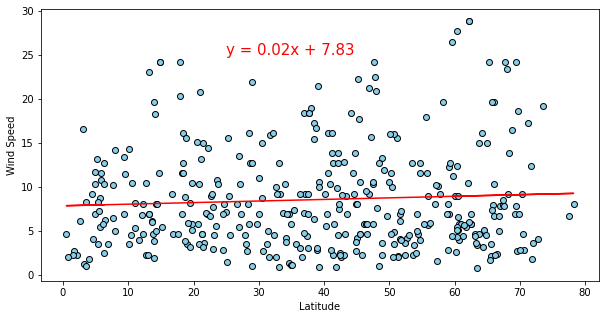

In [57]:

lati_NH = city_data_NH['Lat']
wind_NH = city_data_NH['Wind Speed']

#Calculation of Corelation Coefficient 
correlation = st.pearsonr(lati_NH, wind_NH)
print(f'The correlation betwwen Northern Hemisphere Wind Speed and Latitude is {round(correlation[0],4)}')

# Perform a linear regression 
slope, intercept, rvalue, pvalue, stderr = st.linregress(lati_NH, wind_NH)

# Create equation of line 
regress_values = lati_NH * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the graph and regression line
plt.figure(figsize=(10,5))
plt.scatter(lati_NH, wind_NH, color='skyblue', marker='o', edgecolors='black')
plt.plot(lati_NH, regress_values, 'r-')
plt.annotate(line_eq,(25,25),fontsize=15,color='red')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f'The r-squared is: {rvalue**2}')
print('This charts shows the Wind Speed at the latitude the City is located in Northern Hemisphere. There is almost no correlation between wind speed and latitude. Very low r-squared indicate that it is very difficult to predict the Wind Speeds at any given latitude in northern hemisphere')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation betwwen Southern Hemisphere Wind Speed and Latitude is -0.2844
The r-squared is: 0.08087412274185281
This charts shows the Wind Speed at the latitude the City is located in Southern Hemisphere. There is a negative correlation close to zero between latitude and windspeed. Very low r-squared indicate that it is very difficult to predict the Wind Speeds at any given latitude in Southern hemisphere


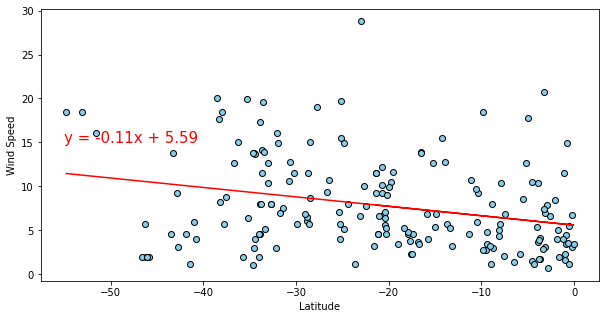

In [59]:

lati_SH = city_data_SH['Lat']
wind_SH = city_data_SH['Wind Speed']

#Calculation of Corelation Coefficient
correlation = st.pearsonr(lati_SH, wind_SH)
print(f'The correlation betwwen Southern Hemisphere Wind Speed and Latitude is {round(correlation[0],4)}')

# Perform a linear regression
slope, intercept, rvalue, pvalue, stderr = st.linregress(lati_SH, wind_SH)

# Create equation of line 
regress_values = lati_SH * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the graph and regression line
plt.figure(figsize=(10,5))
plt.scatter(lati_SH, wind_SH, color='skyblue', marker='o', edgecolors='black')
plt.plot(lati_SH, regress_values, 'r-')
plt.annotate(line_eq,(-55,15),fontsize=15,color='red')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f'The r-squared is: {rvalue**2}')
print('This charts shows the Wind Speed at the latitude the City is located in Southern Hemisphere. There is a negative correlation close to zero between latitude and windspeed. Very low r-squared indicate that it is very difficult to predict the Wind Speeds at any given latitude in Southern hemisphere')
plt.show()

Three Observing Trend:

1. As the data is for randomly picked cities around the world the trend of humidity, windspeed, cloudiness and tempretrure will depend on the time you pull the data. 
2. There is very less correlation between windspeed to latitude, Cloudiness to latitude and humidity to latitude. Temperature has high correlation with the latitude. 

3. I think if we can pull the data at the same time for all the cities in the world we can get a better understanding of the different relationships with the latitude. e.g. if we can pull all the data at Noon local time for all the cities then i think the data will be more useful in predicting the weather pattern. 